# Coursework 2

### PLAGIARISM/COLLUSION DECLARATION

 

Coursework submitted for assessment must be the original work of you and your group. Assignments are subjected to regular checks for plagiarism and/or collusion. Plagiarism is the presentation of another person’s thoughts or words (those outside your group) as if they were your own. Collusion involves obtaining help from someone outside your group to complete your work. In preparing your coursework, you should not seek help, or copy from any other person or source, including the

Internet, without proper and explicit acknowledgement.

 

There is a procedure in place for you to declare individual contributions within your group for courswork. You must declare the contributions fairly and accurately.

 

You must not disclose your solutions or insights related to coursework with anyone else, including future students or the Internet.

 

By acknowledging the the statements above, you are declaring that both this and all subsequent pieces of coursework are, and will remain, the original work of you and your group.

 

* Submissions will not be accepted without the aforementioned declaration.

 

* Members of a group are deemed to have collective responsibility for the integrity for work submitted and are liable for any penalty imposed, proportionate to their contributions.

In [35]:
using JLD2,FileIO
using LinearAlgebra
using Wavelets
using FFTW
using LinearMaps
using IterativeSolvers
using LinearOperators
using Plots

In [36]:
# Run this code before you start doing the coursework

Base.@kwdef mutable struct CourseWork_1
    
    CID::Int
    Plagiarism_declare::Union{Missing,Bool}
    Demo_willing::Union{Missing,Bool}
    
    # 6.1 Proximal Operator
    
    Q6_1_a_data_A::Matrix
    Q6_1_a_data_b::Vector
    Q6_1_a_data_z::Vector
    Q6_1_a_data_gamma::Float64
    
    Q6_1_a_ans_x::Union{Missing,Vector}
    
    Q6_1_b_data_z::Vector
    Q6_1_b_data_a::Float64
    Q6_1_b_data_b::Float64
    Q6_1_b_data_gamma::Float64
    
    Q6_1_b_ans_x::Union{Missing,Vector}
    
    Q6_1_c_data_z::Vector
    Q6_1_c_data_k::Int
    Q6_1_c_data_gamma::Float64
    
    Q6_1_c_ans_x::Union{Missing,Vector}
    
    Q6_1_d_data_z::Vector
    Q6_1_d_data_gamma::Float64
    
    Q6_1_d_ans_x::Union{Missing,Vector}
    
    Q6_1_e_data_Z::Matrix
    Q6_1_e_data_r::Int
    Q6_1_e_data_gamma::Float64
    
    Q6_1_e_ans_X::Union{Missing,Matrix}
    
    Q6_1_f_data_Z::Matrix
    Q6_1_f_data_gamma::Float64
    
    Q6_1_f_ans_X::Union{Missing,Matrix}
    
    Q6_1_g_data_Z::Matrix
    Q6_1_g_data_gamma::Float64
    
    Q6_1_g_ans_X::Union{Missing,Matrix}
    
    Q6_1_h_data_z::Vector
    Q6_1_h_data_gamma::Float64
    
    Q6_1_h_ans_x::Union{Missing,Vector}
    
    # 6.2 Proximal operators related to ℓ1-norm
    
    Q6_2_a_data_z::Vector
    Q6_2_a_data_gamma::Float64
    Q6_2_a_data_lambda::Float64
    
    Q6_2_a_ans_x::Union{Missing,Vector}
    
    Q6_2_b_data_z::Vector
    Q6_2_b_data_a::Vector
    Q6_2_b_data_gamma::Float64
    Q6_2_b_data_lambda::Float64
    
    Q6_2_b_ans_x::Union{Missing,Vector}
    
    Q6_2_c_data_z::Vector
    Q6_2_c_data_U::Matrix
    Q6_2_c_data_gamma::Float64
    Q6_2_c_data_lambda::Float64
    
    Q6_2_c_ans_x::Union{Missing,Vector}
    
    Q6_2_d_data_z::Vector
    Q6_2_d_data_U::Matrix
    Q6_2_d_data_gamma::Float64
    Q6_2_d_data_lambda::Float64
    
    Q6_2_d_ans_x::Union{Missing,Vector}
    
    # 7.1 Greedy Algorithms
    
    Q7_1_1_data_y::Vector
    Q7_1_1_data_A::Matrix
    Q7_1_1_data_S::Int
    
    Q7_1_1_ans_x::Union{Missing,Vector}
    
    Q7_1_2_data_y::Vector
    Q7_1_2_data_A::Matrix
    Q7_1_2_data_S::Int
    
    Q7_1_2_ans_x::Union{Missing,Vector}
    
    Q7_1_3_data_y::Vector
    Q7_1_3_data_A::Matrix
    Q7_1_3_data_S::Int
    
    Q7_1_3_ans_x::Union{Missing,Vector}
    
    # 7.2 Proximal Gradient Method
    
    Q7_2_1_data_z::Vector
    Q7_2_1_data_xini::Vector
    Q7_2_1_data_A::Matrix
    Q7_2_1_data_lambda::Float64
    Q7_2_1_data_gamma::Float64
    
    Q7_2_1_ans_xhat::Union{Missing,Vector}
    Q7_2_1_ans_subgradient::Union{Missing,Vector}
    
    Q7_2_2_data_z::Vector
    Q7_2_2_data_A::Matrix
    Q7_2_2_data_lambda::Float64
    
    Q7_2_2_ans_objfun::Union{Missing,Vector}
    
    # 7.3 MRI CS Recovery: Wavelet
    
    Q7_3_1_data_X0::Matrix
    Q7_3_1_data_Omega::Matrix
    Q7_3_1_data_y::Vector
    
    Q7_3_1_ans_gradient::Union{Missing,Matrix}
    
    Q7_3_2_data_lambda::Float64
    
    Q7_3_2_ans_X1::Union{Missing,Matrix}
    
    Q7_3_3_ans_X::Union{Missing,Matrix}
    
    # 7.4 MRI CS Recovery: DCT
    
    Q7_4_1_data_X0::Matrix
    Q7_4_1_data_Omega::Matrix
    Q7_4_1_data_y::Vector
    Q7_4_1_data_lambda::Float64
    
    Q7_4_1_ans_X1::Union{Missing,Matrix}
    
    Q7_4_2_ans_X::Union{Missing,Matrix}
    
    # 7.5 MRI CS Recovery: Wavelet and DCT
    
    Q7_5_1_data_Z1::Matrix
    Q7_5_1_data_Z2::Matrix
    Q7_5_1_data_Omega::Matrix
    Q7_5_1_data_y::Vector
    Q7_5_1_data_lambda::Float64
    Q7_5_1_data_alpha::Float64
    
    Q7_5_1_ans_X1::Union{Missing,Matrix}
    
    Q7_5_2_ans_Z1::Union{Missing,Matrix}
    Q7_5_2_ans_Z2::Union{Missing,Matrix}
    
    Q7_5_3_ans_X::Union{Missing,Matrix}
    
end

CourseWork_1

In [39]:
# Download and upload data from JLD file, refer to https://juliaio.github.io/JLD2.jl/dev/
# Example
A = JLD2.load("Chin Young Anson, Hon1260366StudentFile.jld2");
A = A[ "CourseWork_1" ];
A.Demo_willing = true;
A.Plagiarism_declare = true;

In [42]:
jldopen("Chin Young Anson, Hon1260366StudentFile.jld2", "w") do file
    write(file, "CourseWork_1", A)
  end

## 6.1. Proximal Operator


### 1. (a)

In [37]:
# save your answers in Q6_1_a_ans_x
A_mat = A.Q6_1_a_data_A
b = A.Q6_1_a_data_b
z = A.Q6_1_a_data_z
gamma = A.Q6_1_a_data_gamma

# Convert the question into the least squares form: (1/2 * (x' * (A + 1/gamma * I)) * x) + ((b' - (1/gamma * z') * x) + (1/(2 *gamma *z'z))
# where M = (A + 1/gamma * I)
# and v = (b' - 1/gamma * z')

# Calculate M
M = A_mat + (1/gamma) * I
# Calculate v
v = b' - ((1/gamma) * z')
# Using the backslash operator to solve
x_final = M\v'
error = (0.5 * x_final' * A_mat * x_final) + (b' * x_final) + ((1/(2*gamma)) * (norm((x_final-z), 2)^2))
# println(error)
A.Q6_1_a_ans_x =x_final;



22-element Vector{Float64}:
  0.20907408976977987
 -0.4321348730322507
  0.4026378031942135
 -0.47253102964791355
 -0.8662525057219357
  0.3016941029641427
  0.35458687771003794
 -0.3165326437491033
  0.39792554105879424
  0.5319160885218327
  ⋮
 -0.4232613421835601
 -0.561722684274518
  0.16378416944695304
  0.06759776181393154
 -0.7350707192766153
 -0.580468503698007
  0.789696988137475
 -0.18244333062606144
 -0.2413845156002232

In [40]:
A_mat = A.Q6_1_a_data_A
b = A.Q6_1_a_data_b
z = A.Q6_1_a_data_z
gamma = A.Q6_1_a_data_gamma

# This is the solution when differentiating the miniisation problem, setting equal to zero and solving for x
intermediate= a_1 + (1/gamma).* I(size(a_1, 1))
intermediate_2 = ((1/gamma).*z_1) -b_1
x_final=intermediate\intermediate_2

error = (0.5 * x_final' * A_mat * x_final) + (b' * x_final) + ((1/(2*gamma)) * (norm((x_final-z), 2)^2))
println(error)

A.Q6_1_a_ans_x =x_final;

UndefVarError: UndefVarError: `a_1` not defined

### 1. (b)

In [7]:
# save your answers in Q6_1_b_ans_x
z = A.Q6_1_b_data_z
a = A.Q6_1_b_data_a  
b = A.Q6_1_b_data_b 
gamma = A.Q6_1_b_data_gamma

x = zeros(length(z))
# increment through z and add all indices of x where the criterion a < z. < b is met 
for i in 1:length(z)
    if (z[i]>=a || z[i]<=b)
        x[i]=z[i]
    end
end

error = (1/(2*gamma)) * (norm((x-z), 2)^2)
A.Q6_1_b_ans_x = x;

### 1. (c)

In [8]:
# save your answers in Q6_1_c_ans_x
z = A.Q6_1_c_data_z
k = A.Q6_1_c_data_k
gamma = A.Q6_1_c_data_gamma

# find the absolute values of z
z_abs = abs.(z)

min_error = 1.0e9
final_x = zeros(length(z))

# iterate through the values of k
for k_i in 1:k
    x = zeros(length(z))

    # find the indices of k_i largest absolute values of z
    top_ki_indices = sortperm(z_abs, rev=true)[1:min(k_i, length(z_abs))]

    # copy the largest values of z to x
    x[top_ki_indices] = z[top_ki_indices]

    error = 1/(2*gamma) * norm((x-z),2)^2
    # println("Error: ", error)

    if (error < min_error)
        min_error = error
        final_x = x
    end
end

A.Q6_1_c_ans_x = final_x;

### 1. (d)

In [9]:
z = A.Q6_1_d_data_z
gamma = A.Q6_1_d_data_gamma

# find the absolute values of z
z_abs = abs.(z)

min_error = 1.0e9
final_x = zeros(length(z))

# iterate through till the length of z
for k_i in 1:length(z)
    x = zeros(length(z))

    # find the indices of k_i largest absolute values of z
    top_ki_indices = sortperm(z_abs, rev=true)[1:min(k_i, length(z_abs))]

    # copy the largest values of z to x
    x[top_ki_indices] = z[top_ki_indices]

    error = norm(x, 0) + (1/(2*gamma) * (norm((x-z),2)^2))
    # println("Error: ", error)

    if (error < min_error)
        min_error = error
        final_x = x
    end
end

A.Q6_1_d_ans_x = final_x;

### 1. (e)

In [10]:
Z = A.Q6_1_e_data_Z
r = A.Q6_1_e_data_r 
gamma = A.Q6_1_e_data_gamma

function rank_r_approximation(Z::AbstractMatrix, r::Int)
    # Compute the SVD of Z
    F = svd(Z)

    # Retain only the first r singular values and the corresponding singular vectors
    Ur = F.U[:, 1:r]
    Sr = Diagonal(F.S[1:r])
    Vtr = F.Vt[1:r, :]

    # Compute the rank-r approximation
    X = Ur * Sr * Vtr
    return X
end

X = rank_r_approximation(Z, r)
error = (1/(2*gamma)) * (norm((X  - Z), 2)^2);
A.Q6_1_e_ans_X = X;

### 1. (f)

In [11]:
Z = A.Q6_1_e_data_Z
r = A.Q6_1_e_data_r 
gamma = A.Q6_1_e_data_gamma

function rank_r_approximation(Z::AbstractMatrix, r::Int)
    min_error = 1.0e9
    final_X = zeros(length(z))
    for r in 1:rank(Z)
        # Compute the SVD of Z
        F = svd(Z)

        # Retain only the first r singular values and the corresponding singular vectors
        Ur = F.U[:, 1:r]
        Sr = Diagonal(F.S[1:r])
        Vtr = F.Vt[1:r, :]

        # Compute the rank-r approximation
        X = Ur * Sr * Vtr

        # check error
        error = rank(X) + (1/(2*gamma)) * (norm((X  - Z), 2)^2)
        # println(error)

        if (error < min_error)
            min_error = error
            final_X = X
        end
    end
    # println("Final Error: ", min_error)
    return final_X
end

X = rank_r_approximation(Z, r)
A.Q6_1_f_ans_X = X;

### 1. (g)

In [12]:
Z = A.Q6_1_g_data_Z
gamma = A.Q6_1_g_data_gamma

# Eigendecomposition
F = eigen(Z)

# Take the maximum of each eigenvalue and 0
eigenvalues_non_negative = Diagonal(max.(F.values, 0.0))
# Reconstruct the original matrix but with positive only eigenvalues 
X = F.vectors * eigenvalues_non_negative * inv(F.vectors)

error = (1/(2*gamma)) * (norm((x-z), 2)^2)
# println(error)

A.Q6_1_g_ans_X = X;

### 1. (h)

In [13]:
z = A.Q6_1_h_data_z
gamma = A.Q6_1_h_data_gamma

# Project z onto the unit L2-norm sphere
x = z / norm(z, 2)
error = (1/(2*gamma)) * (norm((x-z), 2)^2)
# println(error)

A.Q6_1_h_ans_x = x;

### 2. (a)

In [14]:
z = A.Q6_2_a_data_z
gamma = A.Q6_2_a_data_gamma
lambda = A.Q6_2_a_data_lambda

# using the solution from this derivation online: https://math.stackexchange.com/questions/1961888/the-proximal-operator-of-the-l-1-norm-function 
x = sign.(z) .* max.((abs.(z) .- (lambda * gamma)), 0.0)

error = (lambda * norm(x, 1)) + ((1 / (2*gamma)) * norm((x - z), 2)^2)
println(error)

A.Q6_2_a_ans_x = x;

2.5382550599399587


### 2. (b)

In [15]:
z = A.Q6_2_b_data_z
a = A.Q6_2_b_data_a
gamma = A.Q6_2_b_data_gamma
lambda = A.Q6_2_b_data_lambda

# using the solution from this derivation online: https://math.stackexchange.com/questions/1961888/the-proximal-operator-of-the-l-1-norm-function 
x =  ((sign.(a.\z) .* max.((abs.(a.\z) .- (lambda * gamma)./(a.*a)), 0.0)))

error = (lambda * norm(x, 1)) + ((1 / (2*gamma)) * norm(((a .* x) - z), 2)^2)
println(error)

A.Q6_2_b_ans_x = x;

18.828588728391352


### 2. (c)

In [16]:
z = A.Q6_2_c_data_z
U = A.Q6_2_c_data_U
gamma = A.Q6_2_c_data_gamma   
lambda = A.Q6_2_c_data_lambda

x = sign.(U\z) .* max.((abs.(U\z) .- (lambda * gamma)), 0.0)

error =(lambda * norm(x, 1)) + ((1 / (2*gamma)) * norm((U*x - z), 2)^2)
println(error)

A.Q6_2_c_ans_x = x;

13.247476897851868


### 2. (d)

In [17]:
z = A.Q6_2_d_data_z
U = A.Q6_2_d_data_U
gamma = A.Q6_2_d_data_gamma
lambda = A.Q6_2_d_data_lambda

# using the solution from this derivation online: https://math.stackexchange.com/questions/1961888/the-proximal-operator-of-the-l-1-norm-function 
x = inv(U) * ((sign.(U*z) .* max.((abs.(U*z) .- (lambda * gamma)), 0.0)))

error = (lambda * norm((U*x), 1)) + ((1/(2*gamma)) * (norm((x-z), 2)^2)) 
println(error)

A.Q6_2_d_ans_x = x;


7.4239586626969025


## 7.1. Greedy Algorithms

### 1

In [41]:
A_mat = A.Q7_1_1_data_A
y = A.Q7_1_1_data_y
S = A.Q7_1_1_data_S

function omp_implementation(A_mat::Matrix, y::Vector{T}, S::Int) where T
    # Initialize variables
    n = size(A_mat, 2)
    idx_set = Bool[]
    x = zeros(T, n)
    residual = copy(y)
    selected_atoms = Int[]

    for _ in 1:S
        # Find the index of the column most correlated with the residual
        correlations = abs.(A_mat' * residual)
        _, idx = findmax(correlations)
        
        # Append the selected atom's index to the list
        push!(selected_atoms, idx)

        # Solve least squares problem on the selected atoms
        Asub = A_mat[:, selected_atoms]
        xsub = Asub \ y

        # Update the solution and residual
        x[selected_atoms] = xsub
        residual = y - Asub * xsub
    end

    return x, selected_atoms
end

final_x, _ = omp_implementation(A_mat, y, S)

# verify against the CompressedSensing package
import CompressedSensing: omp
x_compressed_sensing = omp(A_mat, y, S)
final_x_sparse = sparse(final_x)
println("Verification of implementation: ", isapprox(final_x_sparse, x_compressed_sensing, atol=1e-5))

# calculate the error
min_error = 0.5 * (norm((x_compressed_sensing - (A_mat'*y)), 2)^2)
min_error_implementation = 0.5 * (norm((final_x_sparse - (A_mat'*y)), 2)^2)

A.Q7_1_1_ans_x = final_x;

ArgumentError: ArgumentError: Package CompressedSensing not found in current path.
- Run `import Pkg; Pkg.add("CompressedSensing")` to install the CompressedSensing package.

### 2

In [19]:
A_mat = A.Q7_1_2_data_A
y = A.Q7_1_2_data_y
S = A.Q7_1_2_data_S

function compute_residue(y, A)
    proj = A * (A\y);
    return y - proj
end 

function compute_hard_thresholding(x, S)
    h = zeros(length(x))
    x_abs = abs.(x)
    
    # Create an index array for the elements of x
    indices = collect(1:length(x))
    
    # Use partialsortperm to get indices of the S largest elements
    S_largest_indices = partialsortperm(x_abs, 1:S, rev=true)

    # Only fill the S largest indices in h
    for i in S_largest_indices
        h[i] = x[i]
    end

    return h
end

function sp_algorithm(A, y, S)
    m, n = size(A)
    x_hat = zeros(n)
    J = findall(i -> i != 0, compute_hard_thresholding(A' * y, S))
    y_r = compute_residue(y, A[:, J])

    best_error = Inf

    while true
        # Compute proxy
        proxy = A' * y_r
        # Expand support
        new_support = findall(i -> i != 0, compute_hard_thresholding(proxy, S))
        J = union(J, new_support)

        # Estimate 2S-sparse signal and perform hard thresholding
        b = zeros(n)
        b[J] = A[:, J] \ y
        J = findall(i -> i != 0, compute_hard_thresholding(b, S))

        # Estimate S-sparse signal
        x_hat_new = zeros(n)
        x_hat_new[J] = A[:, J] \ y

        # Compute error and check exit condition
        error = 0.5 * sum(abs2, y - A * x_hat_new)
        if error >= best_error
            break
        else
            x_hat = x_hat_new
            best_error = error
            y_r = y - A * x_hat
        end
    end

    return x_hat
end

final_x = sp_algorithm(A_mat, y, S)

# verify against the CompressedSensing package
import CompressedSensing: sp
x_compressed_sensing = sp(A_mat, y, S)
final_x_sparse = sparse(final_x)
println("Verification of implementation: ", isapprox(final_x_sparse, x_compressed_sensing, atol=1e-5))

# find the error
min_error_implementation = 0.5 * (norm((final_x_sparse - (A_mat'*y)), 2)^2)
min_error_compressed_sensing = 0.5 * (norm((x_compressed_sensing - (A_mat'*y)), 2)^2)

A.Q7_1_2_ans_x = final_x;

ArgumentError: ArgumentError: Package CompressedSensing not found in current path.
- Run `import Pkg; Pkg.add("CompressedSensing")` to install the CompressedSensing package.

### 3

In [20]:
y = A.Q7_1_3_data_y;
A_mat = A.Q7_1_3_data_A;
S = A.Q7_1_3_data_S;

function hard_thresholding(x, S)
    # Get the indices of the S largest elements in x
    sorted_indices = sortperm(abs.(x), rev=true)
    S_indices = sorted_indices[1:S]
    
    # Create a sparse vector with the S largest elements
    h = zeros(length(x))
    h[S_indices] .= x[S_indices]
    
    return h
end

function iht_algorithm(A, y, S)
    # initialise x_hat and x to zeros 
    x = zeros(size(A, 2))
    x_hat = zeros(size(A, 2))
    
    best_error = 1e9
    curr_error = 0
    while true
        # conduct hard thresholding to increase the sparsity of the matrix 
        x = hard_thresholding(x + (A' * (y - A * x)), S)
        
        # calculate the error
        curr_error = 0.5 * (norm(x - A' * y))^2
        
        # Break if error does not reduce
        if curr_error >= best_error
            break
        end
        
        # Otherwise save current error as best error 
        best_error = error
        x_hat .= x
    end
    
    return x_hat, best_error
end
 
x_final, error  = iht_algorithm(A_mat, y, S)
println("Error:  ", error)

A.Q7_1_3_ans_x = x_final;

Error:  7.4239586626969025


## 7.2. Proximal Gradient Method

### 1

In [32]:
### Run before doing 7.2
z = A.Q7_2_1_data_z
xini = A.Q7_2_1_data_xini
A_ = A.Q7_2_1_data_A
lambda = A.Q7_2_1_data_lambda
gamma = A.Q7_2_1_data_gamma

0.2716290298249974

In [28]:
### Implement Bob's solution
A_invz = inv(A_)*z
x_hat =  sign.(A_invz) .* max.(A_invz, lambda*gamma)

### Assign answer
A.Q7_2_1_ans_xhat = x_hat

57-element Vector{Float64}:
  0.026048446258808037
  0.08873771194128899
  0.044315952828488214
  0.07863250520692716
 -0.026048446258808037
 -0.026048446258808037
 -0.026048446258808037
 -0.026048446258808037
 -0.026048446258808037
  0.2881303494629581
  ⋮
  0.026048446258808037
  0.06130414609356305
  0.04113242588669169
  0.05236764229508806
  0.046706579774137696
  0.059156275490103216
 -0.026048446258808037
  0.1285842976555716
  0.3475024424556859

In [29]:
### Calculate subgradient
function sub_grad(x)
    return lambda*sign.(x) + (1/gamma).*A_'*(A_*x-z)
end
sub_grad(x_hat)
#Obviously, subgradient at x_hat is not 0 for all partical differencal of f

### Assign to answer:
A.Q7_2_1_ans_subgradient = sub_grad(x_hat)

57-element Vector{Float64}:
  0.22498334361308653
  0.1626330761080093
  0.14146874252684888
  0.26945429710509305
 -0.2644627300755652
 -0.10747508965303752
  0.21921239935593845
 -0.3489113447709418
 -0.0887356843220202
  0.5632048102696368
  ⋮
  0.22228844376201673
  0.1179165344613617
 -0.035653584165090374
 -0.016897057130082452
  0.13152776117212164
  0.20317315740948866
 -0.06895068021043775
  0.2589292675028862
  0.23082019414728272

### 2

In [30]:
### Get the upper bound
# Note that del(del(f(xl + t(x-xl)))) = A'*A
# we can apply SVD to A'*A and get A'*A = U*E*V'
# But then, U and V are equal, because A'*A is symmetric
# Also, note that U or V is orthonormal
# Thus, x'*(A'*A)*x = x1 ^2 * eignevalue1 + x2^2 * eigenvalue2 ......
# Thus, our Lipschitz constant is the largest eigen value
U, E, V = svd(A_'A_)
L = E[1]/gamma
upperbound = 1/L

### Assign answer:


0.07378232984366925

### 3

In [31]:
### Implement proximal gradient method, run 5 Iteration

step_size = upperbound/2  # Get step size
x = x_hat   #Initialize x at bob
record = zeros(5)
for i in 1:5
    step = x - step_size*((1/gamma).*A_'*(A_*x-z)) #  get step

    # Apply proximal operator closed form from part 6.2a
    x = sign.(step) .* max.((abs.(step) .- (lambda*step_size)), 0.0)
    # Record to objective function
    loss = lambda * norm(x,1)+ 1/(2*gamma)*norm(A_*x-z)^2
    record[i] = loss
    print("Iteration ",i,": ",loss,"\n")
end

record_final = record

### Assign answer:
A.Q7_2_2_ans_objfun = record_final;


Iteration 1: 0.6111222603624284
Iteration 2: 0.567764836567186
Iteration 3: 0.5393694002472806
Iteration 4: 0.5182759908094511
Iteration 5: 0.5013679760531293


## 7.3. MRI CS Recovery: Wavelet

### 1

In [26]:
# function MRI(x,omega)
#     m,n=size(x)
#     O1= fft(x)
#     O2= fftshift(O1)
#     O3= zeros(ComplexF64,m,n)
#     for i in 1:m
#         for j in 1:n
#             if omega[i,j]==1
#                 O3[i,j]=O2[i,j]
#             end
#         end
#     end
#     O3=vec(O3)
#     O3 = filter(x -> x != 0, vec(O3))
#     return O1,O2,O3
# end

# function IvMRI(y,omega)
#     m,n=size(omega)

#     vec_omega = vec(omega)
#     O1 = complex(Array{Float64}(undef, length(vec_omega)))
#     j = 1
#     for i in 1:length(vec_omega)
#         if vec_omega[i] != 0
#             O1[i] = round(y[j]; digits = 8)
#             j+=1
#         end
#     end
#     O1=reshape(O1, m,n)
#     O2=ifftshift(O1)
#     O3=ifft(O2)
#     return O1,O2,O3
# end


# Ay = 
# find_Ay(
#     A.Q7_3_1_data_Omega,
#     A.Q7_3_1_data_y
# )

# AAX = 
# find_AAX(
#     A.Q7_3_1_data_Omega,
#     A.Q7_3_1_data_X0
# )

### Test the functions:
# input = X - gamma * find_grad(X,Omega,y)
# z = prox_dwt(input,lambda, gamma)
# f_1_hat(z,X,Omega,y,gamma)


In [85]:
function adj_A(Omega, y)
    vec_omega = vec(Omega)
    O1 = complex(Array{Float64}(undef, length(vec_omega)))
    j = 1
    for i in 1:length(vec_omega)
        if vec_omega[i] != 0
            O1[i] = y[j]
            j+=1
        end
    end
    O1 = reshape(O1,512,512)
    O2=ifftshift(O1)
    O3=ifft(O2)
    return O3
end

function find_AAX(X,Omega)
    O1 = fft(X)
    O2 = fftshift(O1)
    O4O3 = Omega .* O2
    O5 = ifftshift(O4O3)
    O6 = ifft(O5)
    return O6
end


function f_grad(X, Omega, y)
    return - adj_A(Omega, y) + find_AAX(X, Omega)
end

### Assign answer:
A.Q7_3_1_ans_gradient = 
f_grad(
    A.Q7_3_1_data_X0,
    A.Q7_3_1_data_Omega,
    A.Q7_3_1_data_y
);


### 2

In [57]:
### NOTE: the wavelet operator is unitary, we can use 6.2d

# Get variables first
X0 = A.Q7_3_1_data_X0
Omega = A.Q7_3_1_data_Omega
y = A.Q7_3_1_data_y
lambda = A.Q7_3_2_data_lambda

# get gamma = 1/2n
m,n = size(A.Q7_3_1_data_X0)
gamma = 1/(2*n)

# get input to proximal operator
z = X0 - gamma * f_grad(X0,Omega,y)

# now we apply proximal operator
function prox_dwt(z,lambda, gamma)      #lambda use in non-differenciable function
    # here we use the solution obtained from 6.2d
    Uz = dwt(z, wavelet(WT.db4))
    a = abs.(Uz).- (lambda * gamma)
    b = max.(a,0.0)
    c = sign.(Uz).*b
    output = idwt(c,  wavelet(WT.db4))   
    return output
end

### Assign to answer:
# Which is just running 1 step of the algorithm
A.Q7_3_2_ans_X1 = 
prox_dwt(
    z, lambda, gamma
);

### 3

In [60]:
### Prepare functions for proximal gradient descent
function f_(X,Omega,y)
    O1 = fft(X)
    O2 = fftshift(O1)
    O2_5 = Omega .* O2
    O3 = filter(x -> x != 0, vec(O2_5))
    v = y-O3
    return 0.5*norm(v)^2
end

function f_hat(z,X,Omega,y,gamma,grad)
    a = f_(X,Omega,y)          #Omega, y are given constants
    b = conj(vec(grad))' * vec(z-X)
    c = (1/(2*gamma))* norm(vec(z-X))^2
    return real(a + b + c)
end



# Get variables
X0 = A.Q7_3_1_data_X0
Omega = A.Q7_3_1_data_Omega
y = A.Q7_3_1_data_y
lambda = A.Q7_3_2_data_lambda

#set gamma manually
gamma_init = 0.5

# Choose yeta between 0, 1
yeta = 0.5

### Apply Proximal gradient method with backtracking
X = X0 # Initialize X
for i in 1:60  # main loop
    gamma = gamma_init
    grad = f_grad(X,Omega,y)
    
    for j in 1:20   # inner loop
        step = X - gamma * grad
        z = prox_dwt(step,lambda, gamma)
        if f_(z,Omega,y) < f_hat(z,X,Omega,y,gamma,grad)
            break
        end 
        gamma *= yeta
    end # end for

    # Print loss to have a look
    if i%1 == 0
        loss = lambda*norm(dwt(X, wavelet(WT.db4)),1)+f_(X,Omega,y)
        print("Iteration ",i,":",loss)
    end


    # Check if exiting criteria is met, if so we exit
    df_0 = f_grad(z,Omega,y)
    df_1 = f_grad(X,Omega,y)
    LHS = norm(df_0 - df_1 - (1/gamma_init)*(z-X))
    RHS = 0.0001* max(norm(df_0),norm(df_1),norm(z),norm(X))     ## Set epsilon here
    if LHS < RHS
        X=z
        break
    end

    # Update X
    X = z
end # end for

X_final = X


### Assign to answer
A.Q7_3_3_ans_X = X_final;


Iteration 1:4.034134273940091e10

Iteration 2:9.596344649836435e9

Iteration 3:2.448642842372771e9

Iteration 4:7.544670482874591e8

Iteration 5:

3.345901810514238e8Iteration 6:2.1970217325954655e8

Iteration 7:1.7828728553190035e8

Iteration 8:

1.521785466906813e8Iteration 9:1.2756206644237451e8

Iteration 10:1.0411044803695557e8

Iteration 11:8.677051979481211e7

Iteration 12:7.877642073778483e7

Iteration 13:7.718915088737716e7

Iteration 14:7.717769564727844e7

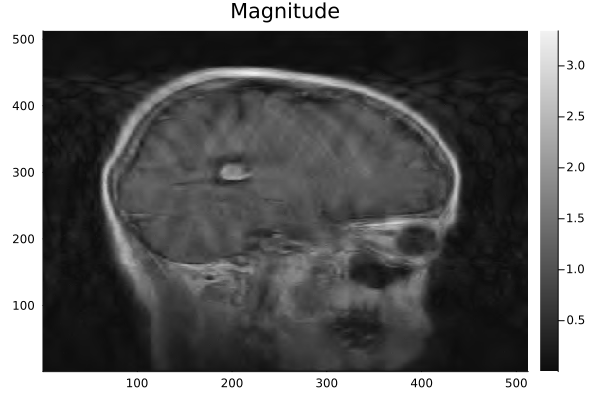

In [61]:
magnitude = abs.(X_final)

# Rotate the data for plotting
magnitude_rotated = magnitude[end:-1:1, end:-1:1]

# Plot the magnitude
p1 = heatmap(magnitude_rotated, color=:grays, title="Magnitude")
plot(p1)


## 7.4. MRI CS Recovery: DCT

### 1

In [63]:
### Run this before everything in 7.4
# Get variables first
X0 = A.Q7_4_1_data_X0;
Omega = A.Q7_4_1_data_Omega;
y = A.Q7_4_1_data_y;
lambda = A.Q7_4_1_data_lambda;

In [64]:
#We can reuse find_grad() from 7.3
# get gamma = 1/2n
m,n = size(X0);
gamma = 1/(2*n);

# get input to proximal operator
z = X0 - gamma * f_grad(X0,Omega,y);

# now we make the proximal operator
function prox_dct(z,lambda, gamma)      #lambda use in non-differenciable function
    # here we use the solution obtained from 6.2d
    Uz = dct(z)
    a = abs.(Uz).- (lambda * gamma)
    b = max.(a,0.0)
    c = sign.(Uz).*b
    output = idct(c)   
    return output
end

### Assign answer:
# one step size of solution
A.Q7_4_1_ans_X1 = 
prox_dct(
    z, lambda, gamma
);

### 2

In [65]:
### We can reuse find_grad() , f_() and f_hat() but have to make new function for prox
# set gamma manually
gamma_init = 0.5

# Choose yeta between 0, 1
yeta = 0.5

### Apply Proximal gradient method with backtracking
X = X0 # Initialize X
for i in 1:1000  # main loop
    gamma = gamma_init
    grad = f_grad(X,Omega,y)
    for j in 1:100   # inner loop
        step = X - gamma * grad
        z = prox_dct(step,lambda, gamma)
        if f_(z,Omega,y) < f_hat(z,X,Omega,y,gamma,grad)
            break
        end  
        gamma *= yeta   #shrink
    end # end for

    # Print loss to have a look
    if i%10 == 0
        loss = lambda*norm(dwt(X, wavelet(WT.db4)),1)+f_(X,Omega,y)
        print("Iteration ",i,":",loss)
    end

    # Check if exiting criteria is met, if so we exit
    df_0 = f_grad(z,Omega,y)
    df_1 = f_grad(X,Omega,y)
    LHS = norm(df_0 - df_1 - (1/gamma_init)*(z-X))
    RHS = 0.001* max(norm(df_0),norm(df_1),norm(z),norm(X))     ## Set epsilon here
    if LHS < RHS
        X=z
        break
    end

    X = z
end # end for

X_final = X

### Assign to answer:
A.Q7_4_2_ans_X = X_final;


Iteration 10:4.455883422191708e7

Iteration 20:

3.854980328134784e7Iteration 30:3.527598911485242e7

Iteration 40:

3.473834875161109e7Iteration 

50:3.456386463458388e7Iteration 60:3.445766940793827e7

Iteration 70:3.438151003061935e7

Iteration 80:3.433487056694519e7

Iteration 90:

3.4306993828724e7Iteration 100:3.4281268200296454e7

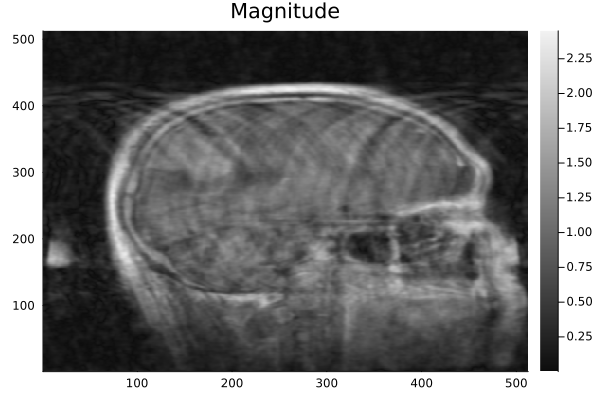

In [34]:

magnitude = abs.(X_final)

# Rotate the data for plotting
magnitude_rotated = magnitude[end:-1:1, end:-1:1]

# Plot the magnitude
p1 = heatmap(magnitude_rotated, color=:grays, title="Magnitude")
plot(p1)


## 7.5. MRI CS Recovery: Wavelet and DCT

### 1

In [221]:
### Run before doing 7.5
Z1 = A.Q7_5_1_data_Z1
Z2 = A.Q7_5_1_data_Z2
Omega = A.Q7_5_1_data_Omega
y = A.Q7_5_1_data_y
lambda = A.Q7_5_1_data_lambda
alpha = A.Q7_5_1_data_alpha

1.0

In [36]:
### Goal: Get X1
# idwt(_,  wavelet(WT.db4))   
# dwt(_, wavelet(WT.db4))
# function find_grad_W(X,Z,alpha)    #Updates X, so Z shall be a constant
#     first_term = -2*idwt(Z,  wavelet(WT.db4))
#     second_term = 2*X       #Note that wavelet transform is unitary
#     constant = alpha/2
#     return constant*(first_term + second_term)
# end

# function find_grad_D(X,Z,alpha)
#     first_term = -2*idct(Z)
#     second_term = 2*X       #Note that DCT transform is unitary, so 2*D_adj*D*X = 2*X
#     constant = alpha/2
#     return constant*(first_term + second_term)
# end

# Formulatting question into least square problem, we get:
# (2*alpha*I + A_adj*A)*X = -alpha*(W_adj(Z1) + D_adj(Z2)) - A_adj(y)

# # First make function for linear map
# function Mappy(X)
#     first_term = 2*alpha*X
#     O1 = fft(X)
#     O2 = fftshift(O1)
#     O4O3 = Omega .* O2
#     O5 = ifftshift(O4O3)
#     second_term = real(ifft(O5))
#     return first_alpha + second_term
# end

# function get_b(Z1_,Z2_)
#     first_term = -alpha*(idwt(Z1_,  wavelet(WT.db4)) + idct(Z2_) )
#     second_term = -adj_A(Omega, y)
#     return first_term + second_term
# end

# # #Make Linear Map to solve least square problem
# # A_linear_map = LinearMap(linear_map, length(b), ismutating=false)
# # output = A_linear_map \ b

In [222]:
### To find arg min x, we solve least square problem in form x'Ax + bx + c = 0
# First prepare function for linear map
function Mappy(X)
    X_reshaped = reshape(X,size(Omega))
    
    #Obtain first term alpha*I*x
    first_term = 2*alpha*X_reshaped

    #Obtain second term A'*A*x
    O1 = fft(X_reshaped)
    O2 = fftshift(O1)
    O3O4 = Omega.*O2
    O5 = ifftshift(O3O4)
    second_term = real(ifft(O5))
    
    return first_term + second_term
end

# Also make a function to get the vector term
function get_b(Z1_,Z2_)
    #NOTE: b = -alpha* (W_adj(Z1) + D_adj(Z2)) - A_adj*y)
    first_term = -alpha*(idwt(Z1_,  wavelet(WT.db4)) + idct(Z2_))   #first term = -alpha* (W_adj(Z1) + D_adj(Z2))
    second_term = -adj_A(Omega, y)      #Second term = - A_adj*y
    return first_term + second_term
end

### Make linear map 
Op = LinearMap(Mappy,size(Omega)[1]*size(Omega)[2])

### Make function that update X with given Z1 and Z2
function update_X(Z1,Z2)
    b_ = vec(real(get_b(Z1,Z2)))
    X1 = reshape(cg(Op,b_,maxiter=100),size(Omega)[1],size(Omega)[2])
    return X1
end

X1 = update_X(Z1,Z2)

### Assign to answer:

A.Q7_5_1_ans_X1 = X1

512×512 Matrix{Float64}:
 -0.00215645   0.259347    1.08618   …   0.258675   -0.423126   0.0344774
 -0.173097    -0.400739    0.483751     -0.124983    0.170371   0.18829
 -0.230471     0.260111    1.06272       0.523424   -1.00149    0.0445389
 -0.305852     0.153072   -0.725495     -1.22935     0.137764   0.0625629
  0.328188     1.08255     0.579336     -1.20997    -0.43169   -0.107018
 -0.122384    -0.293032    0.218575  …  -1.06276    -0.160873   0.245691
 -0.313013     0.0219462  -1.16302      -0.84458    -0.2981    -1.28433
  0.247748     0.495199    0.218631     -0.552648   -0.25371   -0.646782
 -0.263169    -0.0817181   1.00825      -0.682653   -0.469241  -0.177736
  0.0182673   -0.860547   -0.024842     -0.659809    0.781923   0.57346
  ⋮                                  ⋱               ⋮         
  1.01952     -0.338821    0.138035      0.394258   -0.189503   0.29059
 -0.0896786    0.299299   -0.690737      0.196076   -0.827414  -0.158305
 -0.671608    -0.580761    0.807592 

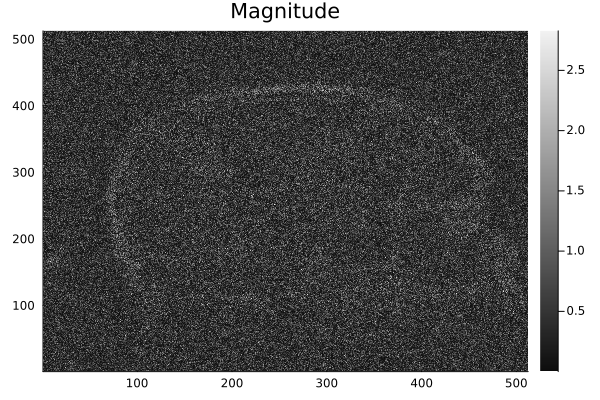

In [38]:
### Plot the thing and have a look
magnitude = abs.(X1)

# Rotate the data for plotting
magnitude_rotated = magnitude[end:-1:1, end:-1:1]

# Plot the magnitude
p1 = heatmap(magnitude_rotated, color=:grays, title="Magnitude")
plot(p1)


### 2

In [79]:
### Update Z1 and Z2

# We can apply closed form of proximal operator using answer from 6.2a
function update_Z1(X,alpha)
    z = dwt(X, wavelet(WT.db4))
    gamma = 1/alpha
    return (sign.(z) .* max.((abs.(z) .- (lambda * gamma)), 0.0))
end

function update_Z2(X,alpha)
    z = dct(X)
    gamma = 1/alpha
    return (sign.(z) .* max.((abs.(z) .- (lambda * gamma)), 0.0))
end

Z1_out = update_Z1(X1,alpha)
Z2_out = update_Z2(X1,alpha)


### Assign to answer
A.Q7_5_2_ans_Z1 = Z1_out
A.Q7_5_2_ans_Z2 = Z2_out


512×512 Matrix{Float64}:
 -0.0   0.0   0.0  -0.0   0.0  -0.0  …   0.0   0.0  -0.0  -0.0  -0.0  -0.0
  0.0   0.0  -0.0  -0.0  -0.0   0.0     -0.0   0.0   0.0   0.0   0.0  -0.0
  0.0  -0.0  -0.0  -0.0  -0.0   0.0      0.0  -0.0   0.0   0.0   0.0  -0.0
  0.0   0.0  -0.0  -0.0  -0.0  -0.0      0.0  -0.0  -0.0   0.0  -0.0   0.0
  0.0  -0.0  -0.0   0.0  -0.0   0.0     -0.0  -0.0  -0.0  -0.0   0.0  -0.0
  0.0  -0.0  -0.0  -0.0  -0.0   0.0  …  -0.0   0.0   0.0  -0.0   0.0   0.0
  0.0   0.0  -0.0   0.0   0.0  -0.0      0.0   0.0  -0.0  -0.0  -0.0  -0.0
  0.0  -0.0  -0.0   0.0   0.0   0.0     -0.0  -0.0   0.0  -0.0  -0.0  -0.0
  0.0  -0.0  -0.0   0.0   0.0  -0.0     -0.0  -0.0   0.0  -0.0   0.0   0.0
  0.0   0.0  -0.0   0.0   0.0  -0.0      0.0   0.0   0.0  -0.0  -0.0  -0.0
  ⋮                             ⋮    ⋱                           ⋮    
 -0.0  -0.0   0.0  -0.0   0.0   0.0     -0.0   0.0   0.0  -0.0  -0.0  -0.0
  0.0  -0.0   0.0   0.0   0.0  -0.0     -0.0  -0.0   0.0   0.0  -0.0   0.0
  0.

### 3

In [81]:
Z1 = A.Q7_5_1_data_Z1
Z2 = A.Q7_5_1_data_Z2

### Apply alternating optimization
for i in 1:3
    X = update_X(Z1,Z2)
    Z1 = update_Z1(X,alpha)
    Z2 = update_Z2(X,alpha)
end

X_final = X


### Assign to answer:
A.Q7_5_3_ans_X = X_final

512×512 Matrix{Float64}:
  0.0110257     0.0127713     0.0143426   …   0.00961516    0.0103922
  0.0119309     0.0125734     0.01391         0.00963019    0.0114194
  0.0116668     0.0128406     0.0134403       0.00864505    0.0104222
  0.010864      0.0123511     0.0137247       0.00826909    0.0100414
  0.0103377     0.0115657     0.0126336       0.00621527    0.00751357
  0.00960991    0.0104959     0.0111477   …   0.00418366    0.00532782
  0.00899321    0.0100694     0.0103418       0.00364604    0.00519504
  0.00599963    0.00736323    0.00781266      0.000528192   0.00227389
  0.00200718    0.00575758    0.00499365     -0.00107062   -0.00107233
  0.00104291    0.00294633    0.00190769     -0.000288614   0.000255249
  ⋮                                       ⋱   ⋮            
 -0.00105483    0.000159555  -0.00295576     -0.0079834    -0.00558813
  0.00379224    0.0030144    -0.00172792     -0.00464778   -0.000394513
  0.00425207    0.00277635   -0.0026474   …  -7.41034e-5    0.002

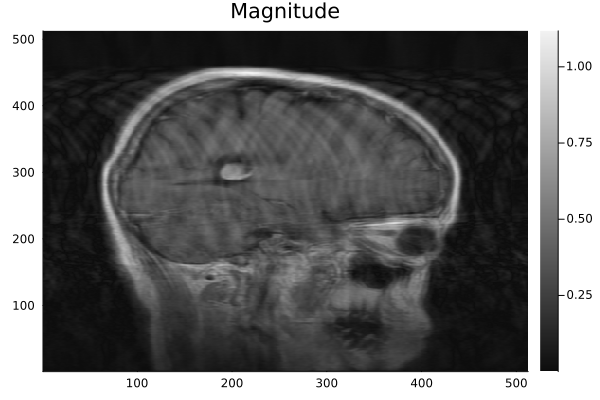

In [82]:
### Plot the thing and have a look
magnitude = abs.(X_final)

# Rotate the data for plotting
magnitude_rotated = magnitude[end:-1:1, end:-1:1]

# Plot the magnitude
p1 = heatmap(magnitude_rotated, color=:grays, title="Magnitude")
plot(p1)